#  Analyzing the Prime Minister's Address" (PM replies to Motion of No Confidence in Lok Sabha, 10 Aug, 2023)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = "pm speech.txt"

In [4]:
with open(file_path, "r", encoding="utf-8") as file:
    speech_text = file.read()

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
speech_text_cleaned = re.sub(r'[^\w\s]', '', speech_text)
speech_text_cleaned = speech_text_cleaned.lower()
words = word_tokenize(speech_text_cleaned)
stop_words = set(stopwords.words("english"))
words_filtered = [word for word in words if word not in stop_words]

In [8]:
lemmatizer = WordNetLemmatizer()
words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

In [9]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(word)["compound"] for word in words_lemmatized]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

In [10]:
print('The average sentiment is:', average_sentiment)

The average sentiment is: 0.014298377028714108


In [11]:
positive_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] > 0.1]
negative_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] < -0.1]
neutral_words = [word for i, word in enumerate(words_filtered) if sentiment_scores[i] >= -0.1 and sentiment_scores[i] <= 0.1]

In [12]:
print('The positive words are:', positive_words)

The positive words are: ['gratitude', 'trust', 'free', 'trust', 'fulfill', 'dreams', 'trust', 'confidence', 'top', 'freedom', 'fighters', 'ensure', 'peace', 'assure', 'faith', 'commitment', 'party', 'revered', 'confidence', 'gratitude', 'trust', 'confidence', 'strength', 'lucky', 'confidence', 'blessings', 'better', 'important', 'interest', 'party', 'free', 'energy', 'determination', 'huge', 'dreams', 'strengths', 'dreams', 'free', 'courage', 'opportunity', 'confidence', 'confidence', 'growth', 'trust', 'fulfill', 'dreams', 'marvel', 'helping', 'save', 'helping', 'save', 'helping', 'save', 'trust', 'like', 'wish', 'well', 'best', 'profit', 'increased', 'success', 'growing', 'stronger', 'responsible', 'vision', 'top', 'definite', 'confidence', 'top', 'faith', 'like', 'agree', 'peace', 'trusting', 'trust', 'certain', 'opportunity', 'trust', 'trust', 'confidence', 'help', 'parties', 'faith', 'dwelled', 'fascination', 'freedom', 'fighters', 'dedicated', 'party', 'freebies', 'winning', 'ass

In [13]:
print('The negative words are:', negative_words)

The negative words are: ['scams', 'poor', 'distrust', 'crimes', 'unacceptable', 'guilty', 'punished', 'pressure', 'stop', 'poor', 'deprived', 'betrayal', 'disappointed', 'scams', 'stressed', 'unsuccessful', 'poor', 'poverty', 'poverty', 'poor', 'poor', 'criticizing', 'distrust', 'bad', 'bad', 'criticism', 'bad', 'misinformation', 'confuse', 'scam', 'crisis', 'severely', 'attacked', 'ills', 'questioned', 'lack', 'poverty', 'hard', 'distrusting', 'lack', 'strike', 'enemy', 'ill', 'misinformed', 'insecurity', 'misinformed', 'low', 'fool', 'arrogance', 'arrogant', 'contradictions', 'damages', 'suffered', 'victims', 'perturbed', 'stuck', 'warned', 'havoc', 'lamented', 'reckless', 'pressure', 'violence', 'saddening', 'crimes', 'unacceptable', 'guilty', 'punished', 'protest', 'failure', 'attack', 'neglect', 'conflict', 'forbidden', 'forbidden', 'loss', 'lack', 'pressure', 'stop', 'worse', 'petty', 'pain', 'suffering']


In [14]:
print('The neutral words are:', neutral_words)

The neutral words are: ['come', 'express', 'immense', 'towards', 'every', 'citizen', 'india', 'repeatedly', 'showing', 'government', 'many', 'key', 'legislations', 'get', 'discussion', 'deserved', 'opposition', 'put', 'politics', 'time', 'period', '21st', 'century', 'impact', 'country', 'next', 'thousand', 'years', 'single', 'focus', 'given', 'youth', 'india', 'government', 'today', 'arisen', 'heart', 'opposition', 'able', 'see', 'people', 'steeped', '2028', 'bring', 'motion', 'country', 'among', '3', 'opposition', 'believes', 'changing', 'names', 'cant', 'change', 'work', 'culture', 'founding', 'fathers', 'country', 'always', 'opposed', 'dynasty', 'politics', 'women', 'central', 'government', 'state', 'government', 'work', 'manipur', 'march', 'path', 'development', 'people', 'manipur', 'mothers', 'daughters', 'manipur', 'nation', 'stands', 'house', 'stands', 'government', 'leave', 'stone', 'unturned', 'manipur', 'gets', 'back', 'track', 'development', 'government', 'given', 'first', '

In [15]:
word_freq_positive = nltk.FreqDist(positive_words)
word_freq_negative = nltk.FreqDist(negative_words)
word_freq_neutral = nltk.FreqDist(neutral_words)

In [16]:
print('The positive words frequency is:', word_freq_positive)

The positive words frequency is: <FreqDist with 74 samples and 138 outcomes>


In [17]:
print('The negative words frequency is:', word_freq_negative)

The negative words frequency is: <FreqDist with 61 samples and 82 outcomes>


In [18]:
print('The neutral words frequency is:', word_freq_neutral)

The neutral words frequency is: <FreqDist with 658 samples and 1382 outcomes>


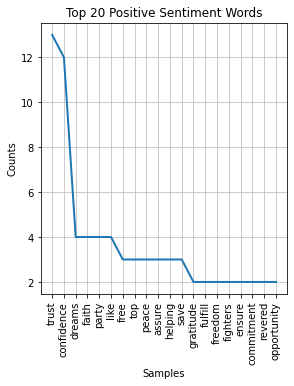

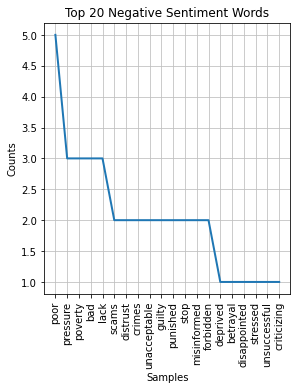

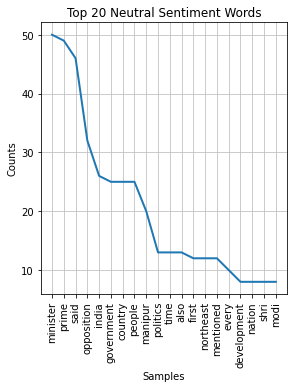

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
word_freq_positive.plot(20, title="Top 20 Positive Sentiment Words")

plt.figure(figsize=(15, 5))
plt.subplot(132)
word_freq_negative.plot(20, title="Top 20 Negative Sentiment Words")

plt.figure(figsize=(15, 5))
plt.subplot(133)
word_freq_neutral.plot(20, title="Top 20 Neutral Sentiment Words")

plt.tight_layout()
plt.show()

In [20]:
df_positive = pd.DataFrame(word_freq_positive.most_common(20), columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(word_freq_negative.most_common(20), columns=['Word', 'Frequency'])
df_neutral = pd.DataFrame(word_freq_neutral.most_common(20), columns=['Word', 'Frequency'])

In [21]:
fig_positive = px.bar(df_positive, x='Word', y='Frequency', title="Top 20 Positive Sentiment Words")
fig_negative = px.bar(df_negative, x='Word', y='Frequency', title="Top 20 Negative Sentiment Words")
fig_neutral = px.bar(df_neutral, x='Word', y='Frequency', title="Top 20 Neutral Sentiment Words")

fig_positive.show()
fig_negative.show()
fig_neutral.show()

In [22]:
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_positive)
wordcloud_negative = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_negative)
wordcloud_neutral = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq_neutral)

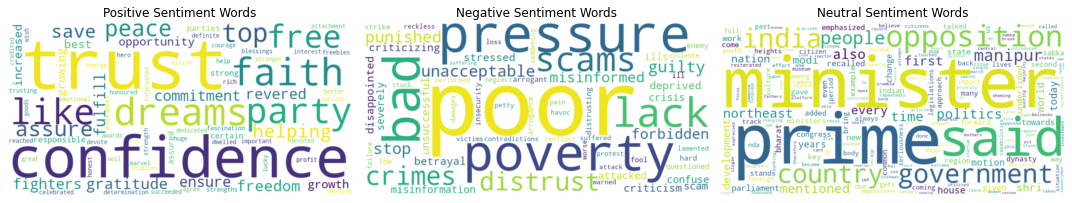

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Words")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Sentiment Words")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral Sentiment Words")

plt.tight_layout()
plt.show()

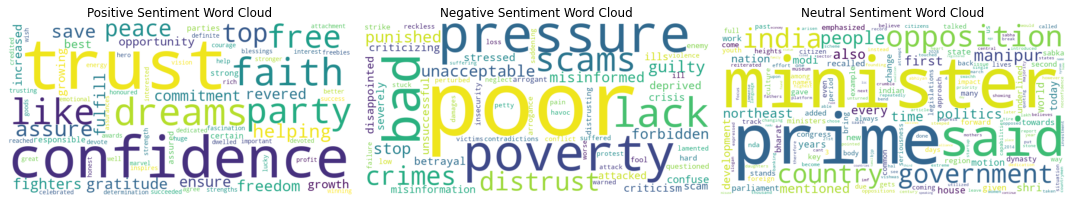

In [24]:
plt.figure(figsize=(15, 10))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")

plt.subplot(132)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")

plt.subplot(133)
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")

plt.tight_layout()
plt.show()

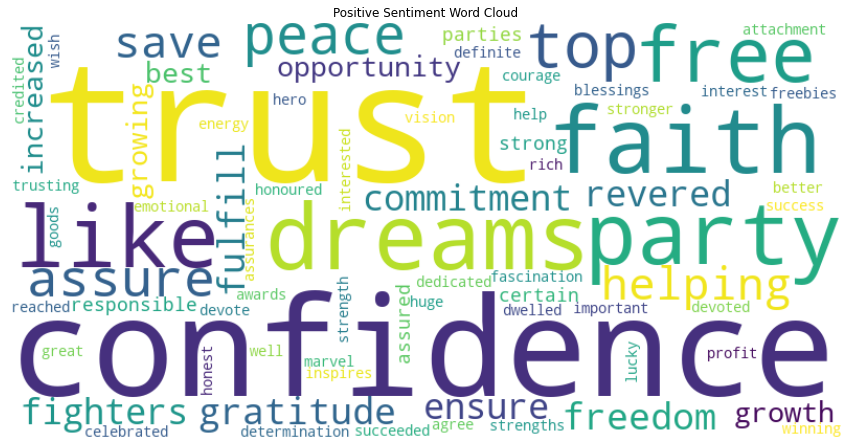

In [25]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Sentiment Word Cloud")
plt.axis("off")
plt.show()

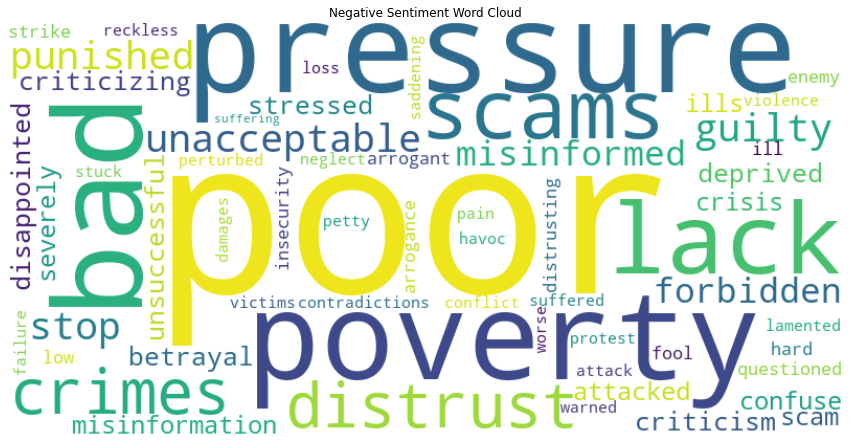

In [26]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Sentiment Word Cloud")
plt.axis("off")
plt.show()

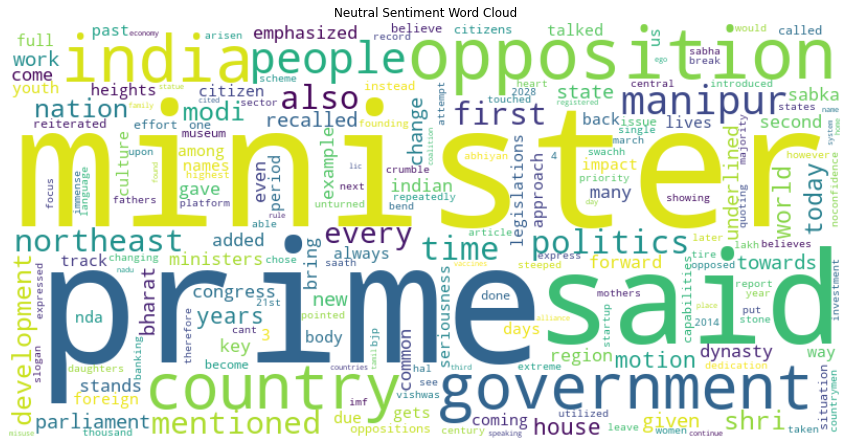

In [27]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_neutral, interpolation="bilinear")
plt.title("Neutral Sentiment Word Cloud")
plt.axis("off")
plt.show()

In [28]:
word_freq = nltk.FreqDist(words_lemmatized)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

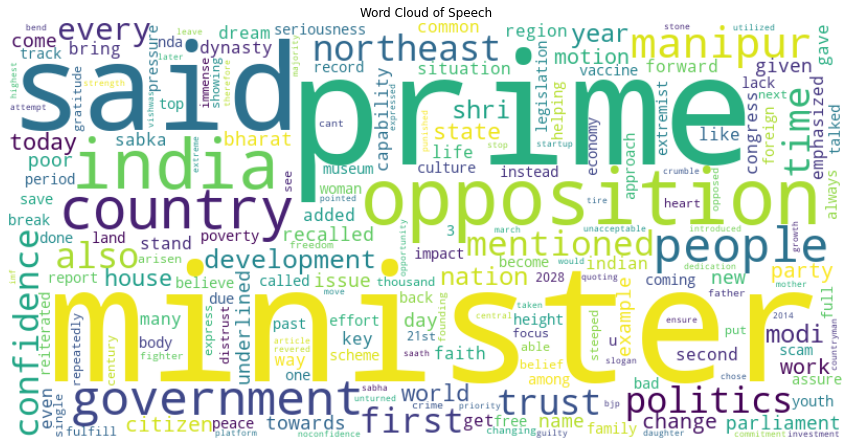

In [29]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Speech")
plt.show()

In [30]:
total_words = len(words_filtered)
positive_percentage = (len(positive_words) / total_words) * 100
negative_percentage = (len(negative_words) / total_words) * 100
neutral_percentage = (len(neutral_words) / total_words) * 100

print("Positive Sentiment Percentage:", positive_percentage)
print("Negative Sentiment Percentage:", negative_percentage)
print("Neutral Sentiment Percentage:", neutral_percentage)

Positive Sentiment Percentage: 8.614232209737828
Negative Sentiment Percentage: 5.118601747815231
Neutral Sentiment Percentage: 86.26716604244695


In [31]:
data = {'Sentiment': ['Positive', 'Negative', 'Neutral'],
        'Percentage': [positive_percentage, negative_percentage, neutral_percentage]}

In [32]:
df_percentages = pd.DataFrame(data)

In [33]:
fig = px.bar(df_percentages, x='Sentiment', y='Percentage', color='Sentiment',
             labels={'Sentiment': 'Sentiment Category', 'Percentage': 'Percentage (%)'},
             title='Percentage of Words in Each Sentiment Category')
fig.show()

In [34]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [35]:
dictionary = corpora.Dictionary([words_filtered])

In [36]:
corpus = [dictionary.doc2bow(words_filtered)]

In [37]:
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.001*"prime" + 0.001*"said" + 0.001*"minister" + 0.001*"opposition" + 0.001*"government"')
(1, '0.001*"prime" + 0.001*"said" + 0.001*"minister" + 0.001*"opposition" + 0.001*"government"')
(2, '0.001*"minister" + 0.001*"prime" + 0.001*"opposition" + 0.001*"said" + 0.001*"india"')
(3, '0.001*"minister" + 0.001*"said" + 0.001*"prime" + 0.001*"government" + 0.001*"opposition"')
(4, '0.029*"minister" + 0.028*"prime" + 0.026*"said" + 0.018*"opposition" + 0.015*"india"')


In [38]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(speech_text)
entities = [(ent.text, ent.label_) for ent in doc.ents]

for entity, label in entities:
    print(f"Entity: {entity}, Label: {label}")

Entity: India, Label: GPE
Entity: the 21st century, Label: DATE
Entity: the next thousand years, Label: DATE
Entity: India, Label: GPE
Entity: 2028, Label: DATE
Entity: 3, Label: CARDINAL
Entity: the Central Government, Label: ORG
Entity: the State Government, Label: ORG
Entity: House, Label: ORG
Entity: first, Label: ORDINAL
Entity: Northeast, Label: LOC
Entity: Parliament, Label: ORG
Entity: Party, Label: ORG
Entity: Parliament, Label: ORG
Entity: second, Label: ORDINAL
Entity: The India of today, Label: WORK_OF_ART
Entity: India, Label: GPE
Entity: Shri Narendra Modi, Label: PERSON
Entity: the Motion of No Confidence, Label: ORG
Entity: Lok Sabha, Label: PERSON
Entity: today, Label: DATE
Entity: House, Label: ORG
Entity: India, Label: GPE
Entity: 2018, Label: DATE
Entity: 2019, Label: DATE
Entity: NDA, Label: ORG
Entity: BJP, Label: ORG
Entity: NDA, Label: ORG
Entity: BJP, Label: ORG
Entity: 2024, Label: DATE
Entity: the past few days, Label: DATE
Entity: the 21st century, Label: DA

In [39]:
from keybert import KeyBERT
kw_extractor = KeyBERT()
keywords = kw_extractor.extract_keywords(speech_text)
for keyword in keywords:
    print(keyword[0])

manipur
nehru
bjp
rajya
gandhi


In [40]:
from nrclex import NRCLex
text_emotion = NRCLex(speech_text_cleaned)
emotions = text_emotion.affect_frequencies
for emotion, frequency in emotions.items():
    print(f"Emotion: {emotion}, Frequency: {frequency}")

Emotion: fear, Frequency: 0.10664993726474278
Emotion: anger, Frequency: 0.1053952321204517
Emotion: anticip, Frequency: 0.0
Emotion: trust, Frequency: 0.1329987452948557
Emotion: surprise, Frequency: 0.02258469259723965
Emotion: positive, Frequency: 0.23462986198243413
Emotion: negative, Frequency: 0.1668757841907152
Emotion: sadness, Frequency: 0.04642409033877039
Emotion: disgust, Frequency: 0.033877038895859475
Emotion: joy, Frequency: 0.06524466750313676
Emotion: anticipation, Frequency: 0.08531994981179424


In [41]:
data = {'Emotion': [], 'Frequency': []}
for emotion, frequency in emotions.items():
    data['Emotion'].append(emotion)
    data['Frequency'].append(frequency)

df_emotions = pd.DataFrame(data)

fig = px.bar(df_emotions, x='Emotion', y='Frequency', color='Emotion',
             labels={'Emotion': 'Emotion', 'Frequency': 'Frequency'},
             title='Emotion Frequencies in the Speech')
fig.show()

In [42]:
import textstat

flesch_score = textstat.flesch_reading_ease(speech_text_cleaned)
flesch_grade = textstat.flesch_kincaid_grade(speech_text_cleaned)
smog_index = textstat.smog_index(speech_text_cleaned)

print(f"Flesch Reading Ease Score: {flesch_score}")
print(f"Flesch-Kincaid Grade Level: {flesch_grade}")
print(f"SMOG Index: {smog_index}")

Flesch Reading Ease Score: -3018.87
Flesch-Kincaid Grade Level: 1192.8
SMOG Index: 0.0


In [43]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

tokens = nltk.word_tokenize(speech_text_cleaned)

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

pmi_scores = finder.score_ngrams(bigram_measures.pmi)

for bigram, pmi in pmi_scores[:10]:
    print(f"Bigram: {bigram}, PMI: {pmi}")

Bigram: ('135', 'crore'), PMI: 11.576484346796851
Bigram: ('400', 'night'), PMI: 11.576484346796851
Bigram: ('5', 'economies'), PMI: 11.576484346796851
Bigram: ('50000', 'per'), PMI: 11.576484346796851
Bigram: ('account', 'yoga'), PMI: 11.576484346796851
Bigram: ('air', 'travel'), PMI: 11.576484346796851
Bigram: ('almost', 'eradicated'), PMI: 11.576484346796851
Bigram: ('arunachal', 'pradesh'), PMI: 11.576484346796851
Bigram: ('aspirations', 'whatever'), PMI: 11.576484346796851
Bigram: ('azad', 'hind'), PMI: 11.576484346796851
